In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Train_Dataset.csv")
test = pd.read_csv("Test_Dataset.csv")
sam = pd.read_csv("Sample_Submission.csv")


data.head()

Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1

In [3]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [6]:
print(data.isnull().sum())

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
print(test.isnull().sum())

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [8]:
data.describe().T

count          mean          std      min      25%      50%  \
id        7303.0  15021.535396  2886.026080  10001.0  12521.5  15054.0   
age       7303.0     53.172669    14.185970     29.0     41.0     53.0   
sex       7303.0      0.499658     0.500034      0.0      0.0      0.0   
cp        7303.0      1.502533     1.115594      0.0      1.0      1.0   
trestbps  7303.0    147.447487    31.099538     94.0    120.0    148.0   
chol      7303.0    342.805970   127.291998    126.0    231.0    341.0   
fbs       7303.0      0.493085     0.499986      0.0      0.0      0.0   
restecg   7303.0      1.013008     0.815806      0.0      0.0      1.0   
thalach   7303.0    136.506093    38.141966     71.0    104.0    137.0   
exang     7303.0      0.503218     0.500024      0.0      0.0      1.0   
oldpeak   7303.0      3.129851     1.791160      0.0      1.6      3.1   
slope     7303.0      0.991510     0.817291      0.0      0.0      1.0   
ca        7303.0      2.019033     1.410546      0.0      1.0      2.0   
thal      7303.0      1.502259     1.113137      0.0      1.0      1.0   
target    7303.0      0.813501     0.389535      0.0      1.0      1.0   

              75%      max  
id        17513.5  19998.0  
age          65.0     77.0  
sex           1.0      1.0  
cp            3.0      3.0  
trestbps    174.0    200.0  
chol        450.0    564.0  
fbs           1.0      1.0  
restecg       2.0      2.0  
thalach     170.0    202.0  
exang         1.0      1.0  
oldpeak       4.7      6.2  
slope         2.0      2.0  
ca            3.0      4.0  
thal          2.0      3.0  
target        1.0      1.0

In [9]:
data.shape

(7303, 15)

In [10]:
print((data.isna().sum()/len(data))*100)

id          0.0
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


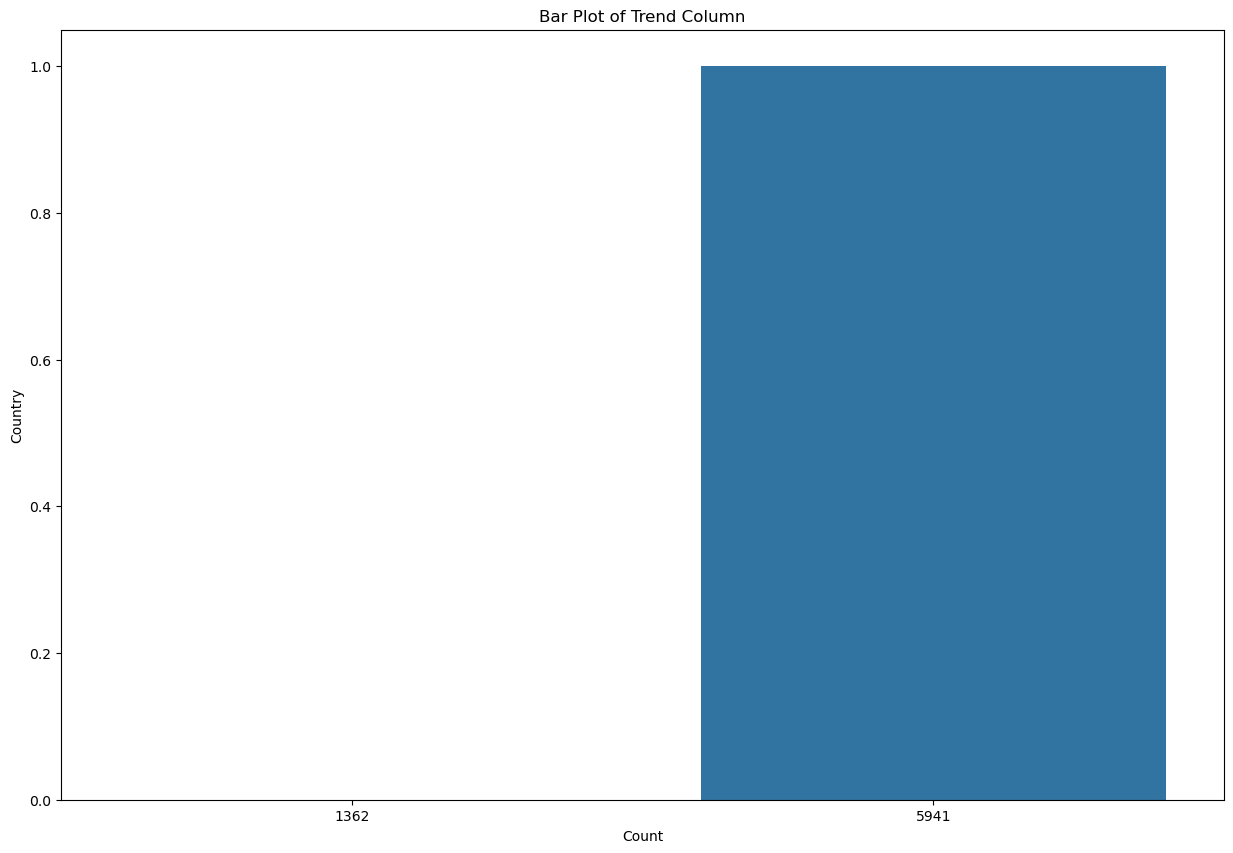

In [11]:
trend_counts = data['target'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=trend_counts.values, y=trend_counts.index)

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Bar Plot of Trend Column')

plt.show()

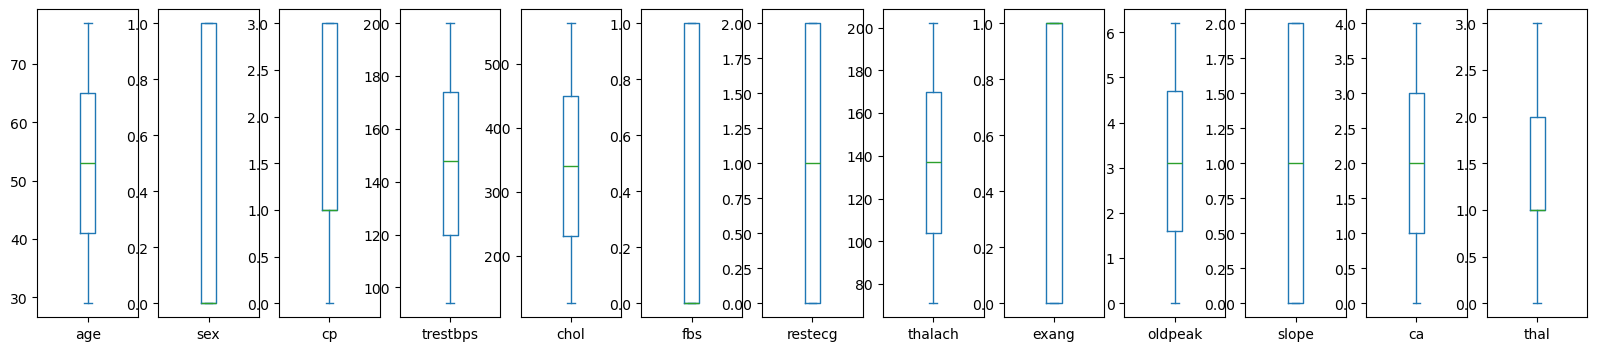

In [13]:
var = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]



data[var].plot(
    kind = 'box',
    figsize = (20, 4),
    subplots = True
);

In [14]:
data = data.drop('id', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7303 non-null   int64  
 1   sex       7303 non-null   int64  
 2   cp        7303 non-null   int64  
 3   trestbps  7303 non-null   int64  
 4   chol      7303 non-null   int64  
 5   fbs       7303 non-null   int64  
 6   restecg   7303 non-null   int64  
 7   thalach   7303 non-null   int64  
 8   exang     7303 non-null   int64  
 9   oldpeak   7303 non-null   float64
 10  slope     7303 non-null   int64  
 11  ca        7303 non-null   int64  
 12  thal      7303 non-null   int64  
 13  target    7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 798.9 KB


<Axes: xlabel='target'>

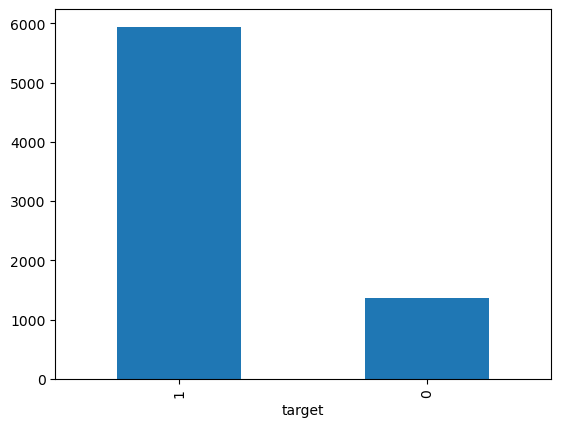

In [15]:
data['target'].value_counts().plot(kind = 'bar')

<Axes: xlabel='age'>

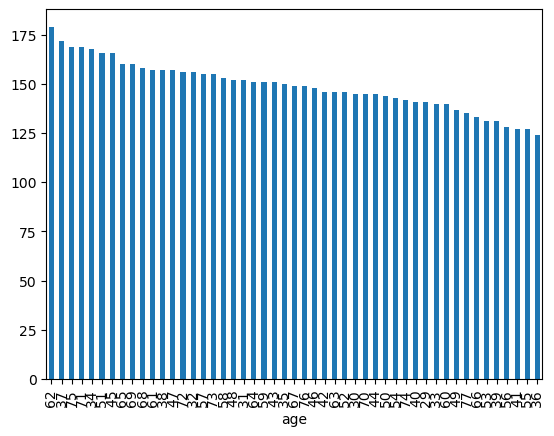

In [17]:
data['age'].value_counts().plot(kind = 'bar')

<Axes: xlabel='sex'>

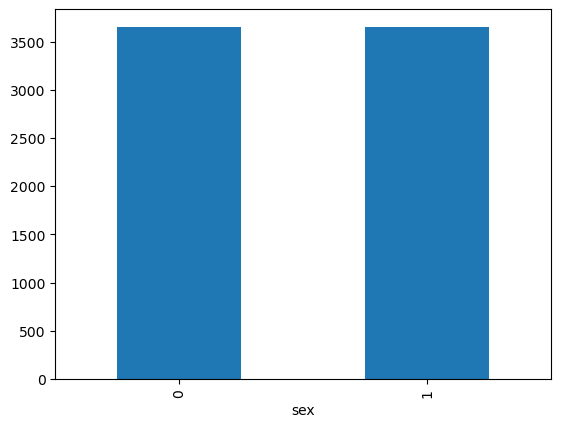

In [18]:
data['sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target'>

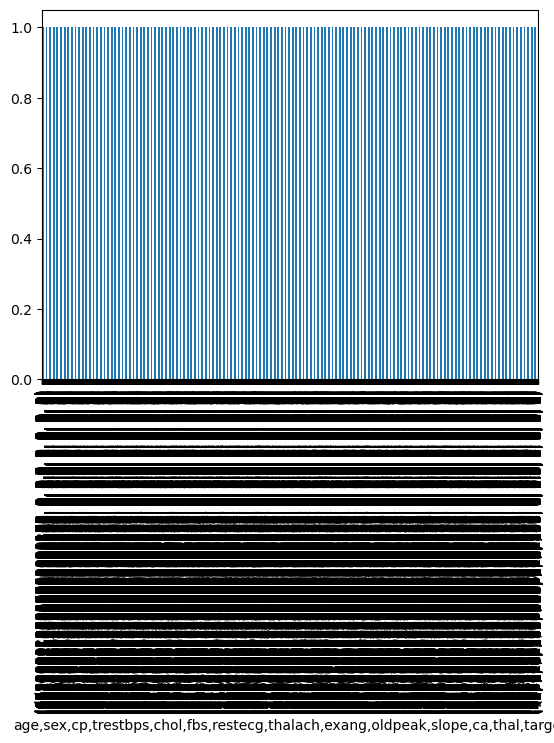

In [19]:
data.value_counts().plot(kind = 'bar')

In [20]:
print(data['target'].value_counts())

target
1    5941
0    1362
Name: count, dtype: int64


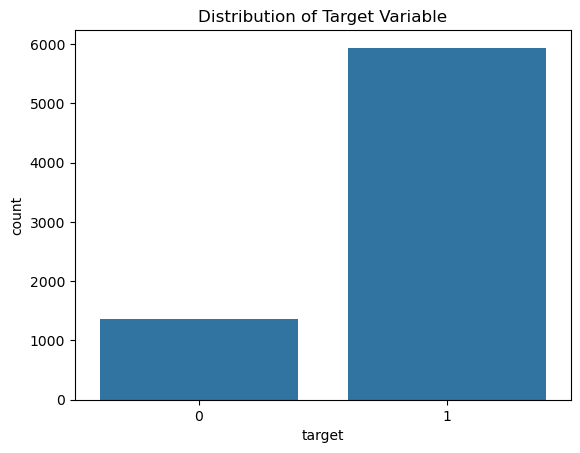

In [21]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

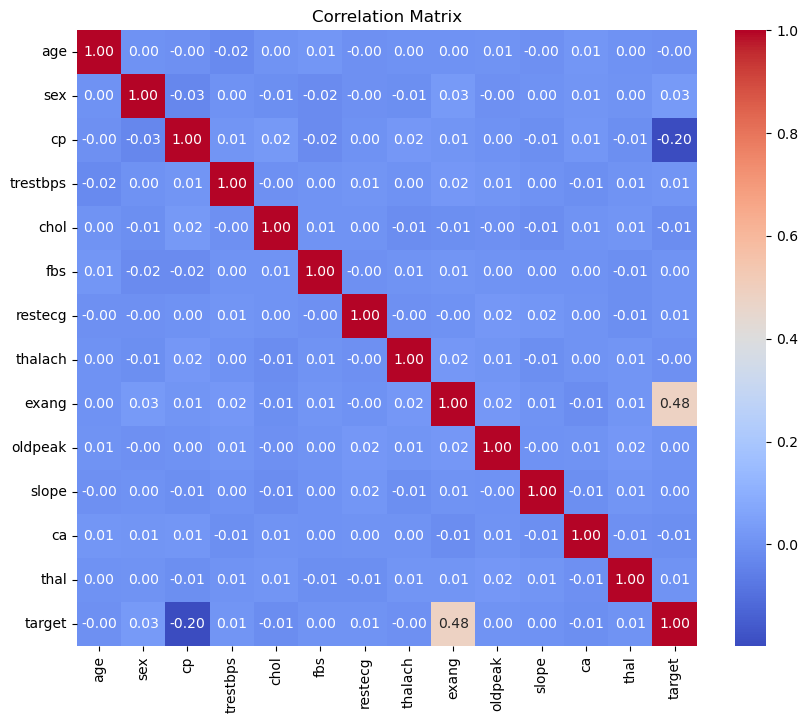

In [22]:
corr = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

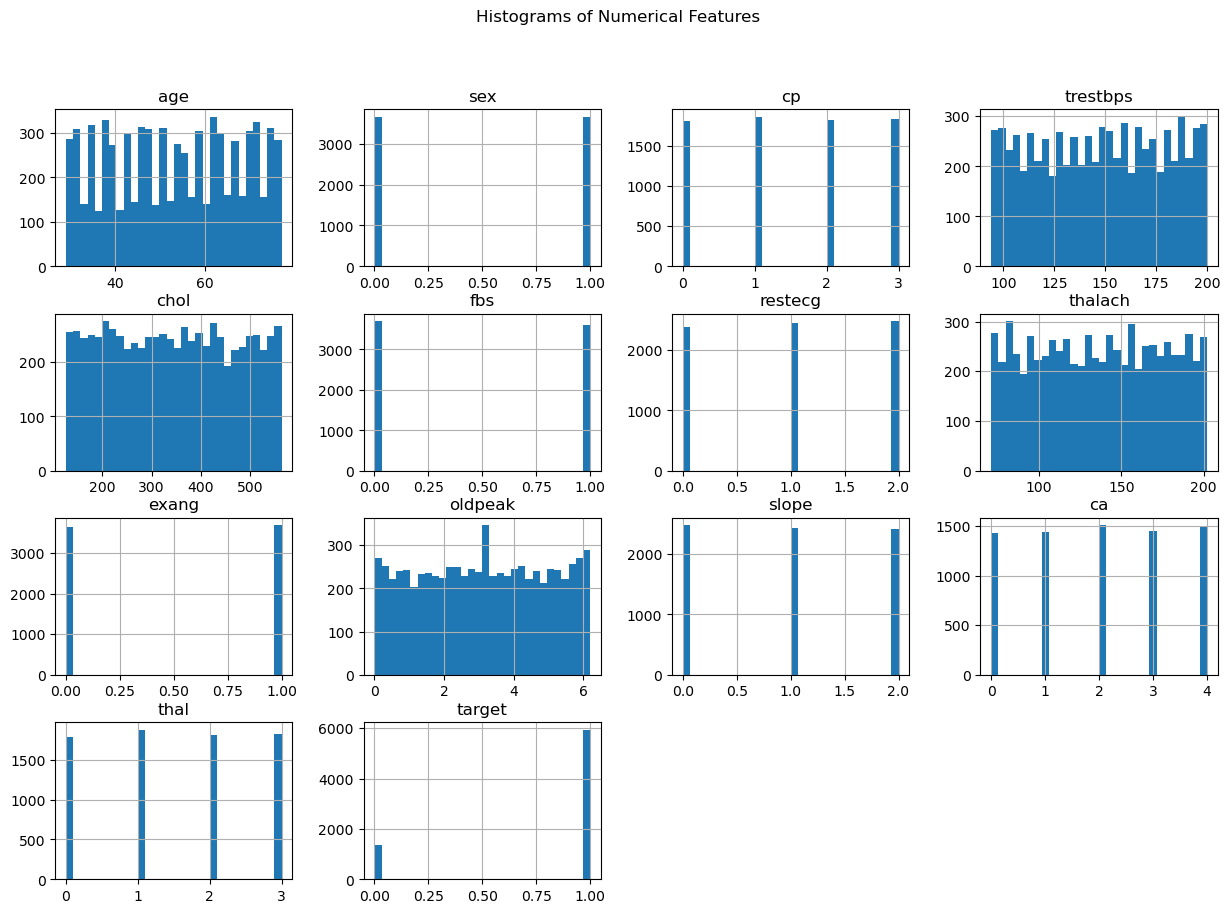

In [23]:
# Histogram of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


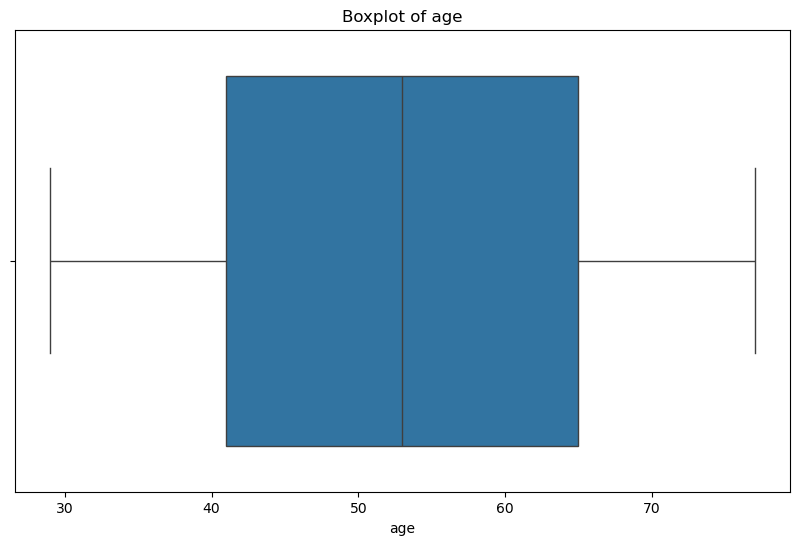

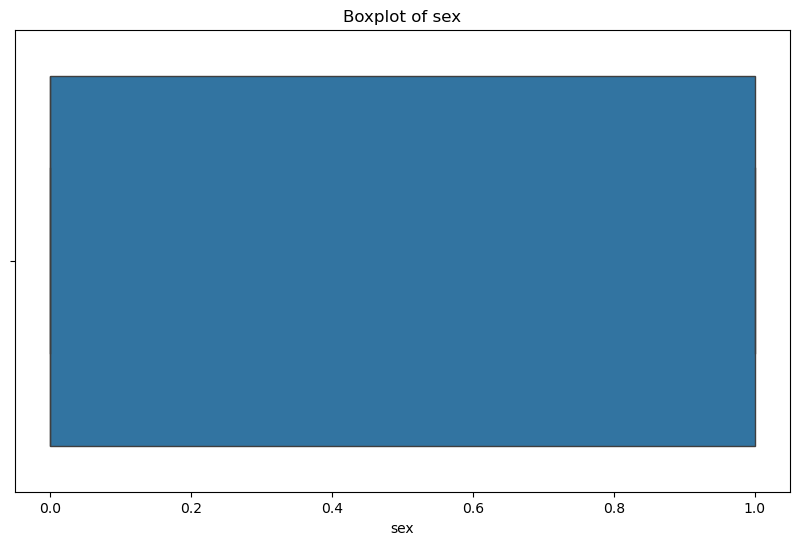

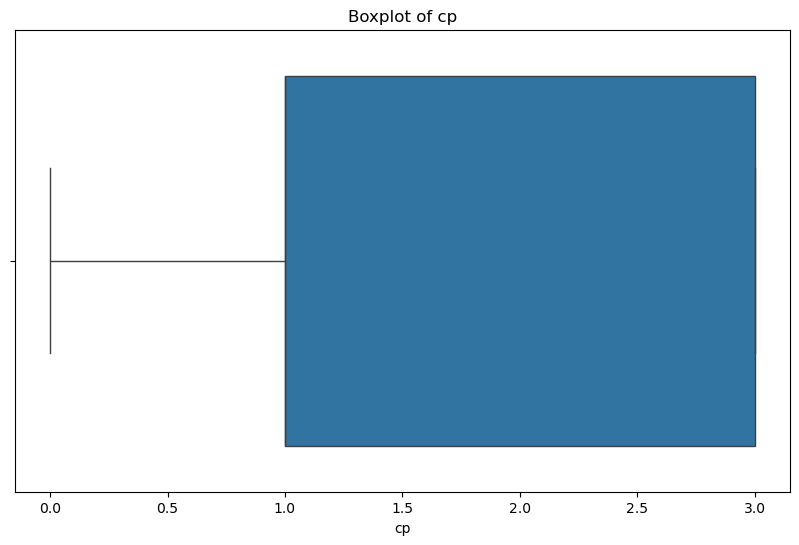

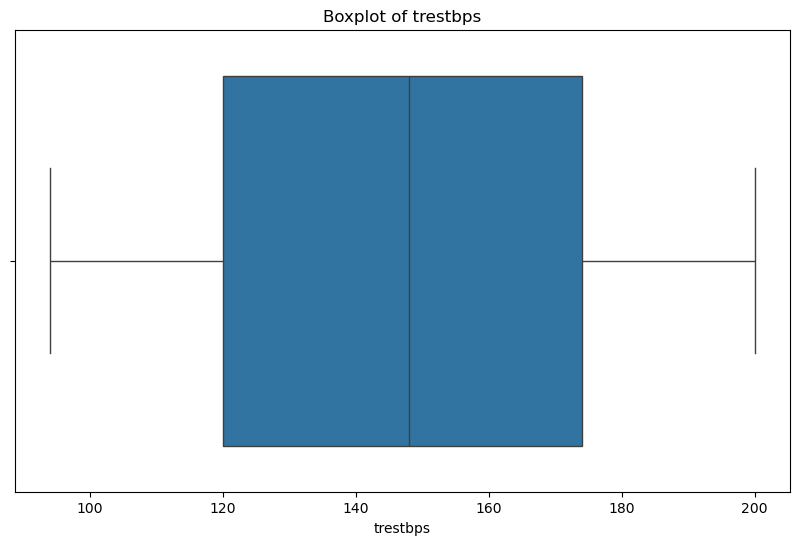

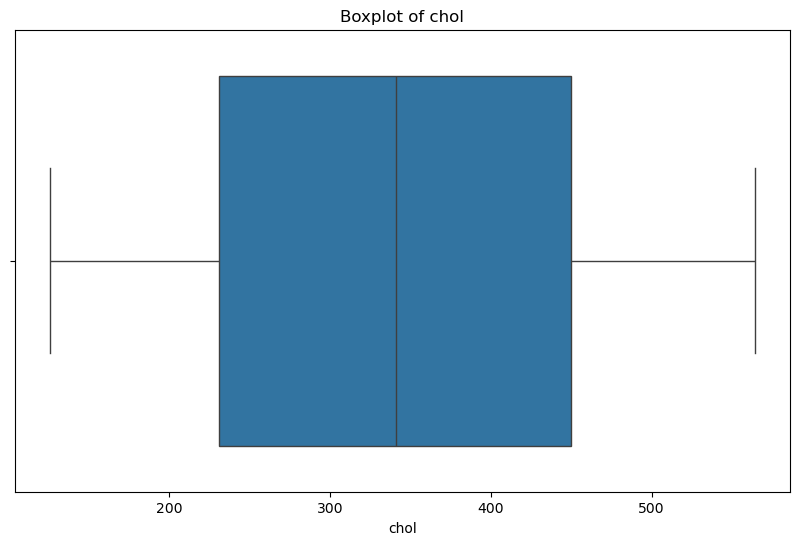

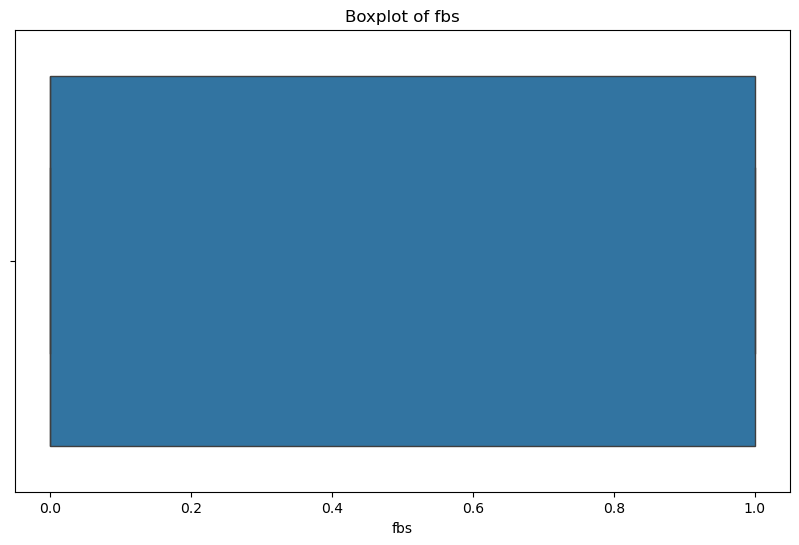

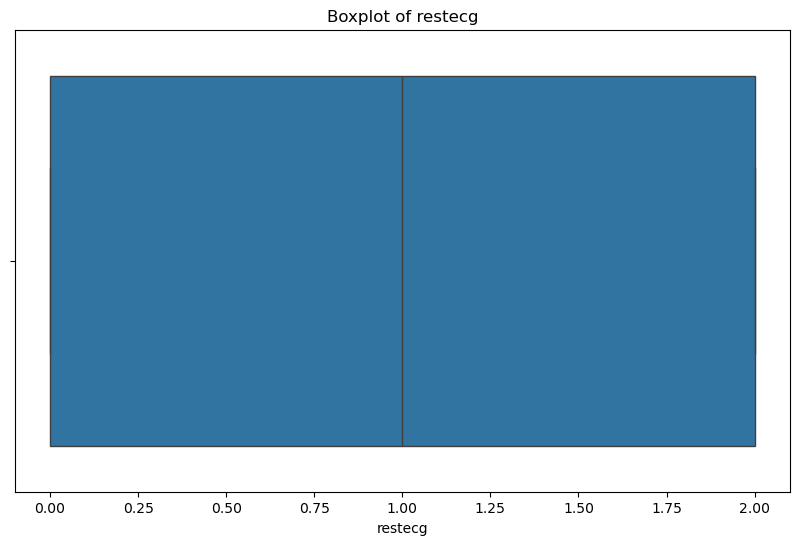

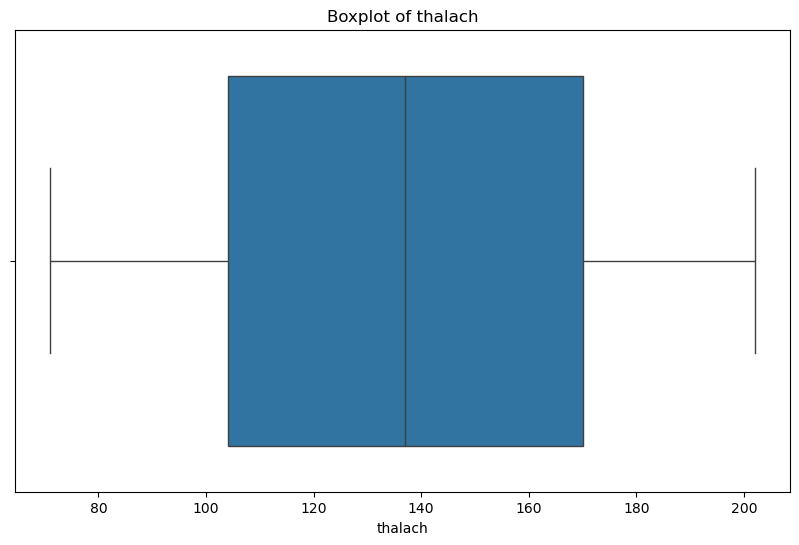

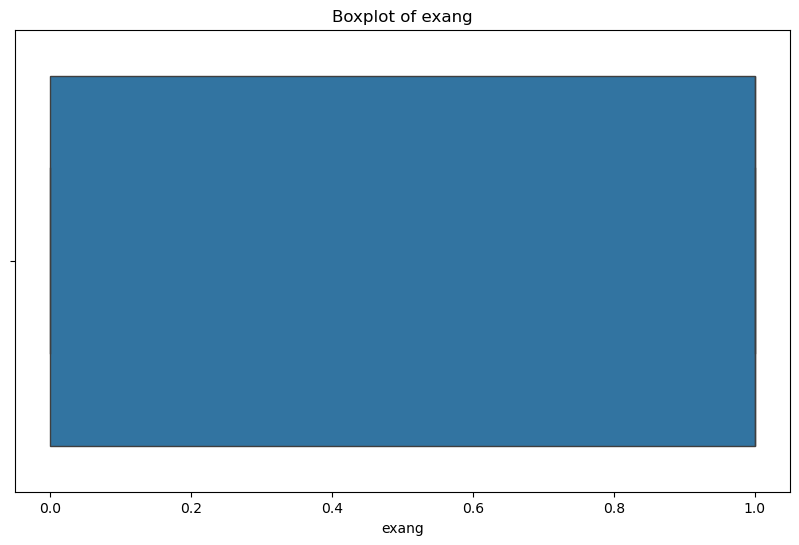

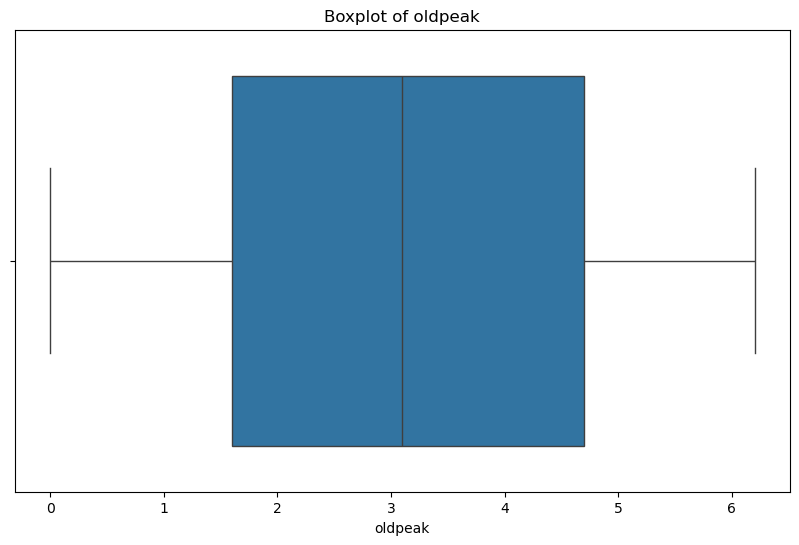

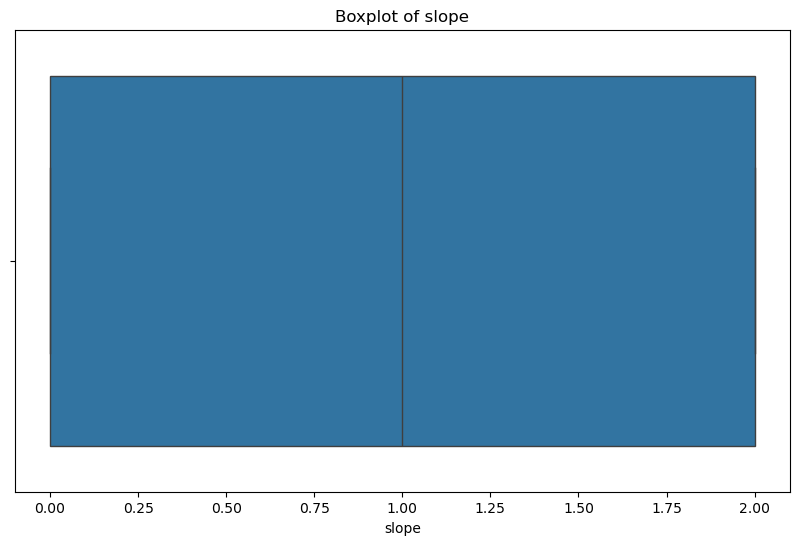

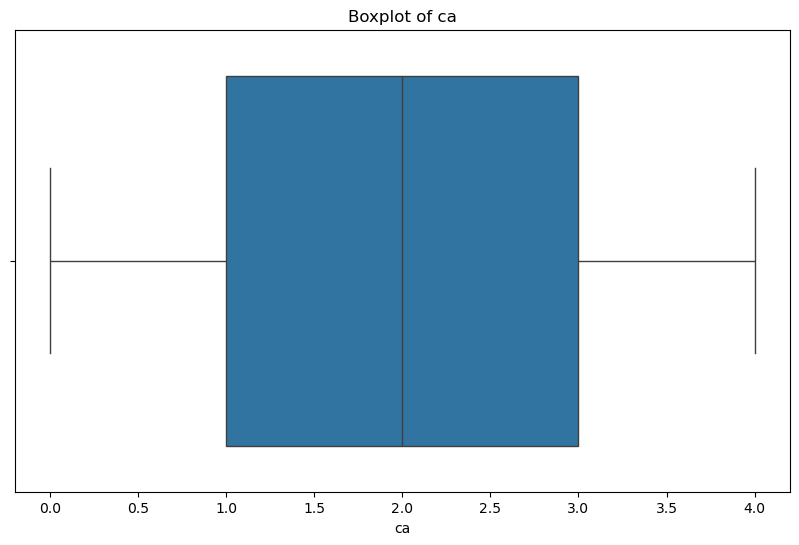

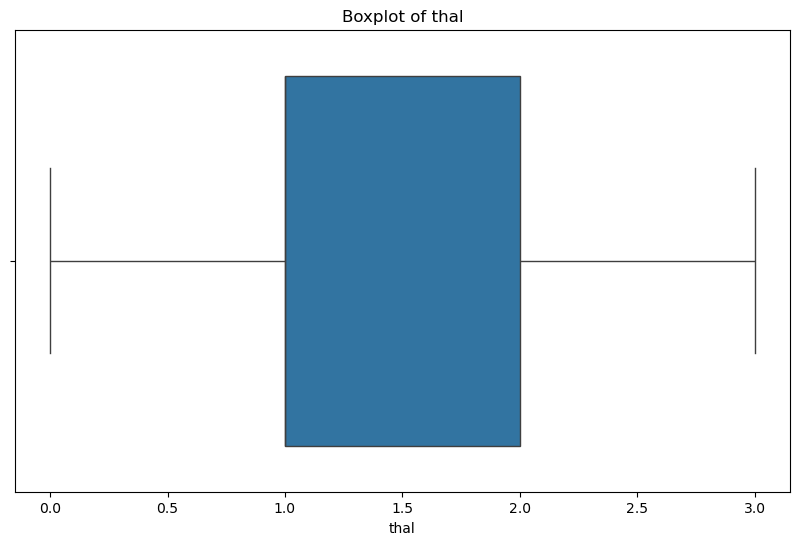

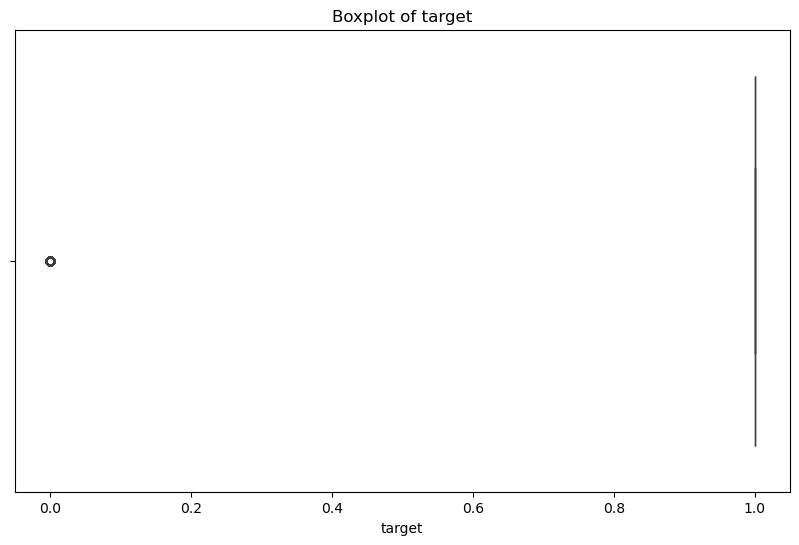

In [24]:
# Box plots to identify outliers in numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


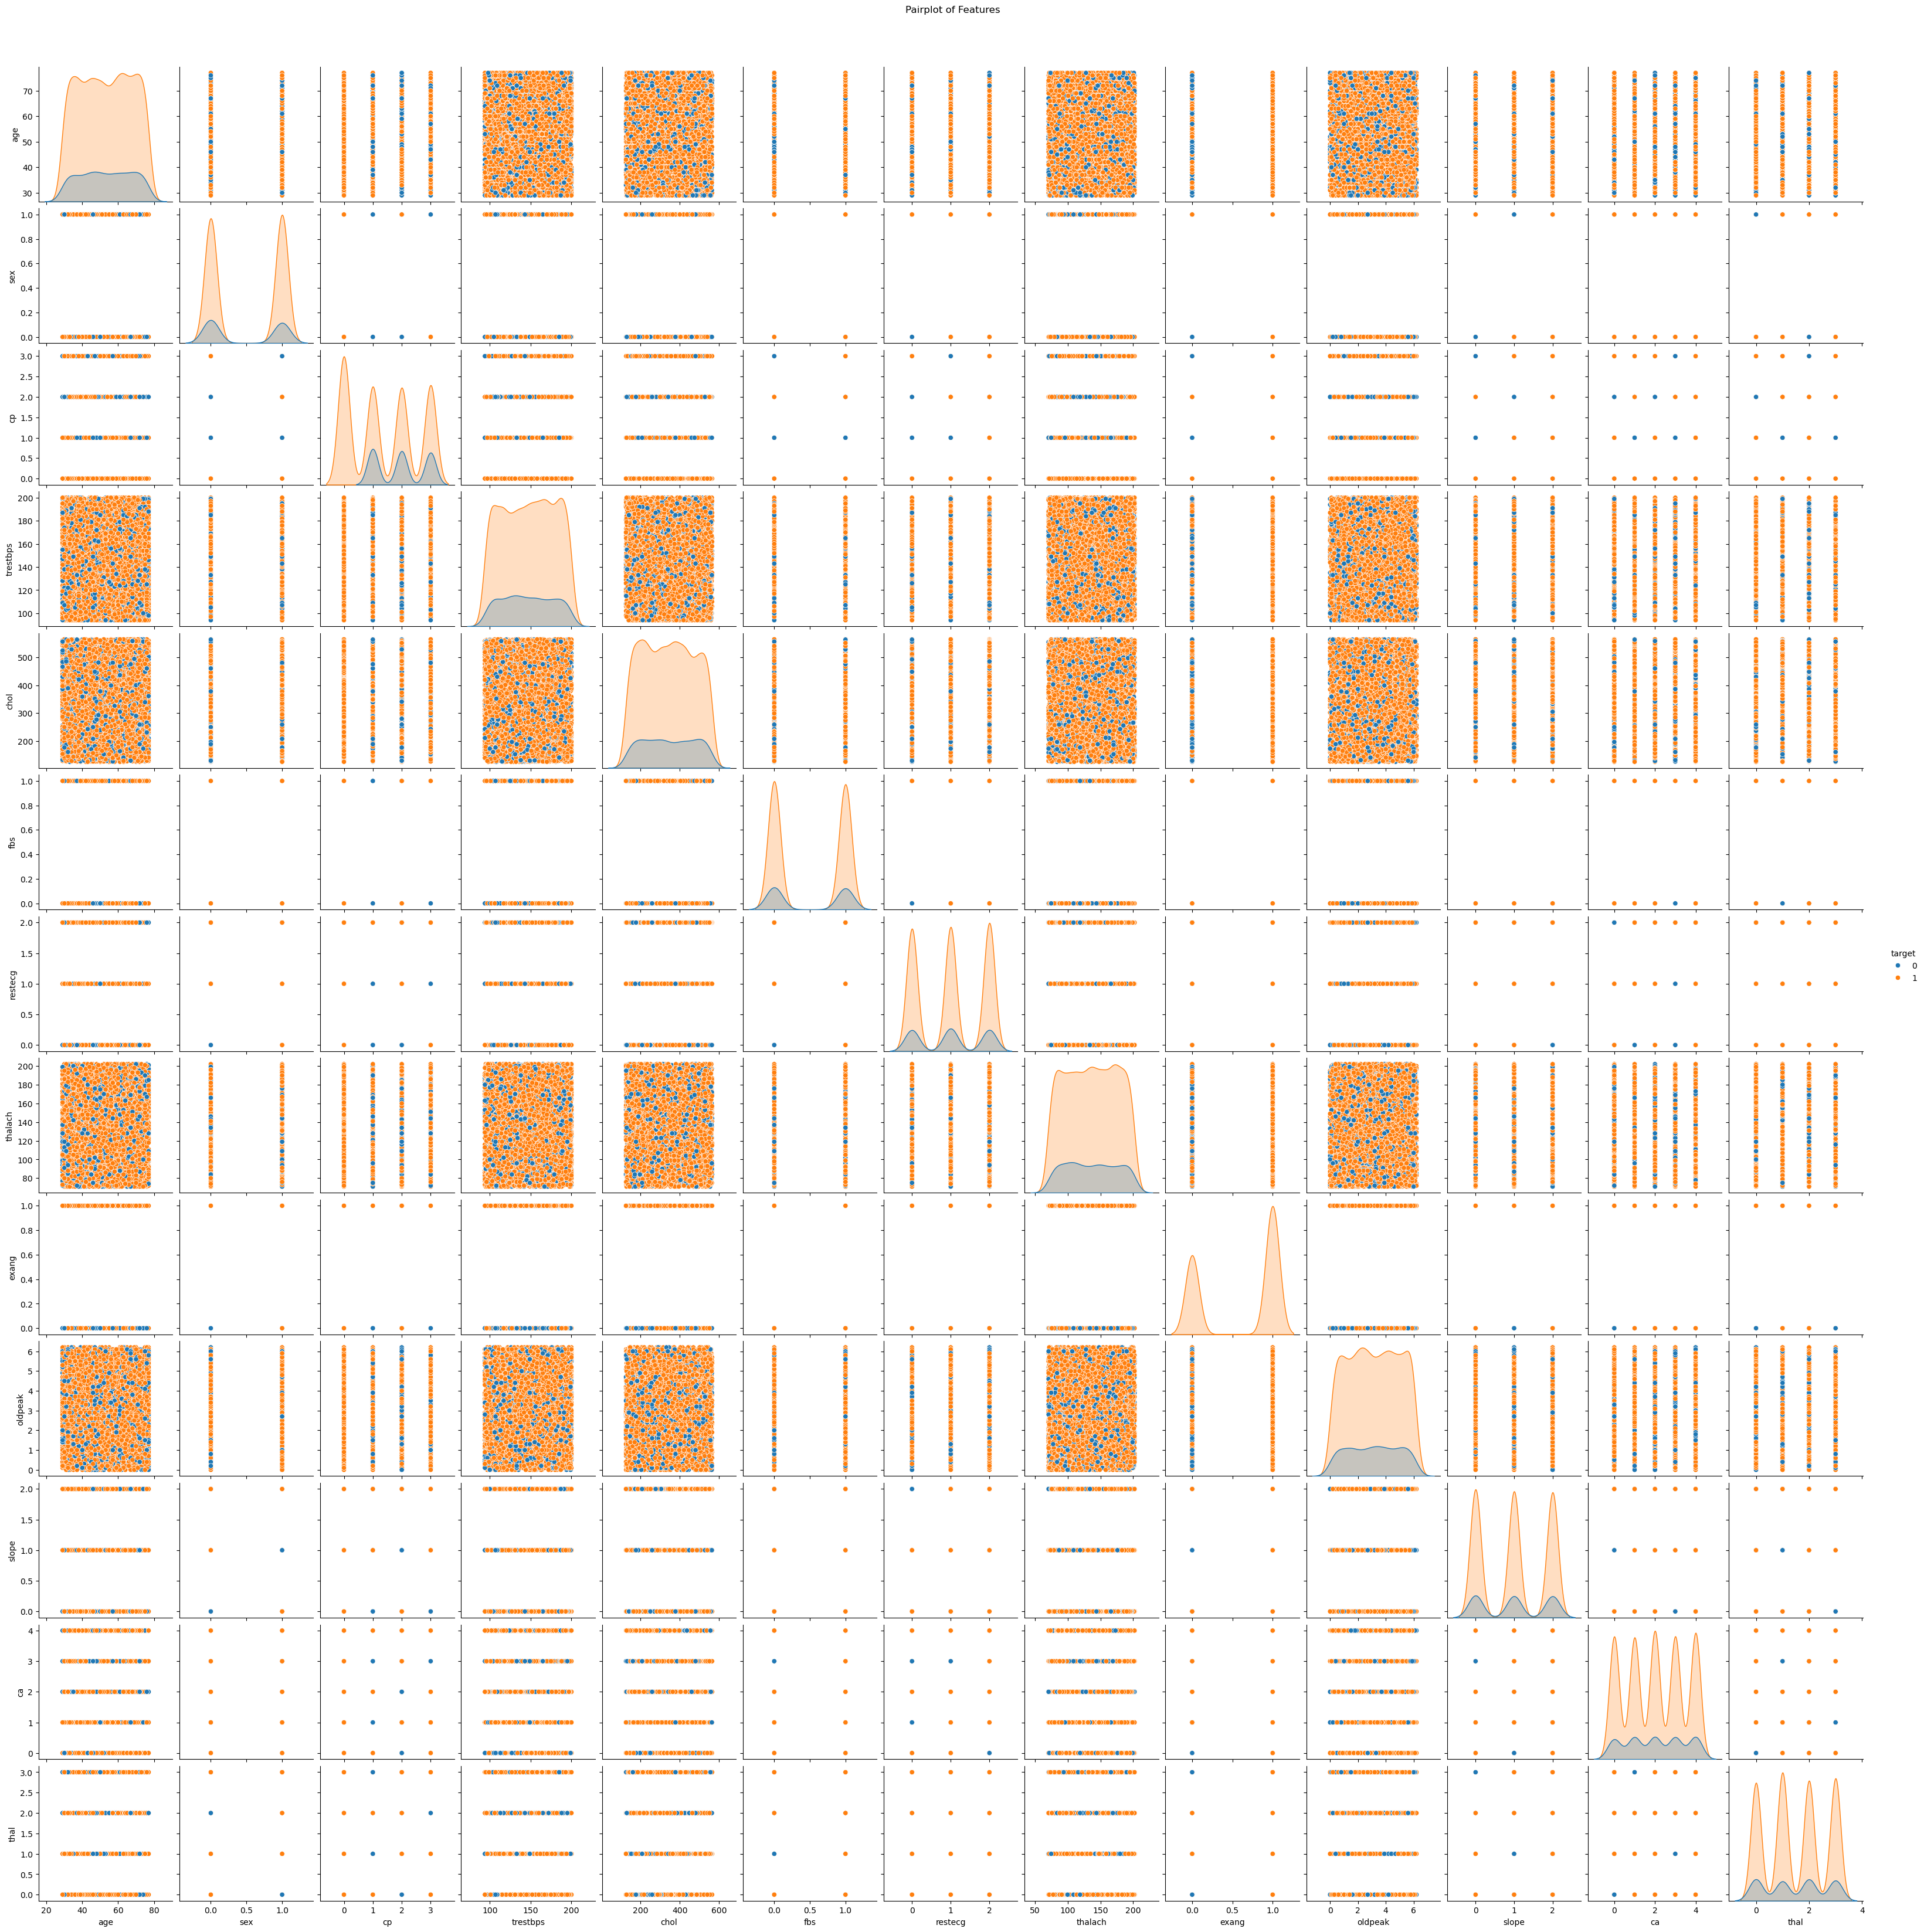

In [25]:
# Pairplot to visualize relationships between numerical features and the target
sns.pairplot(data, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


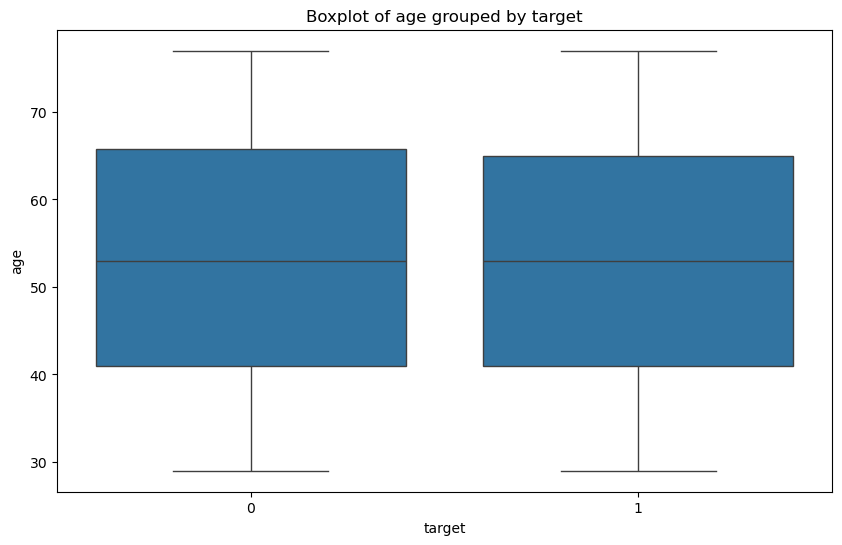

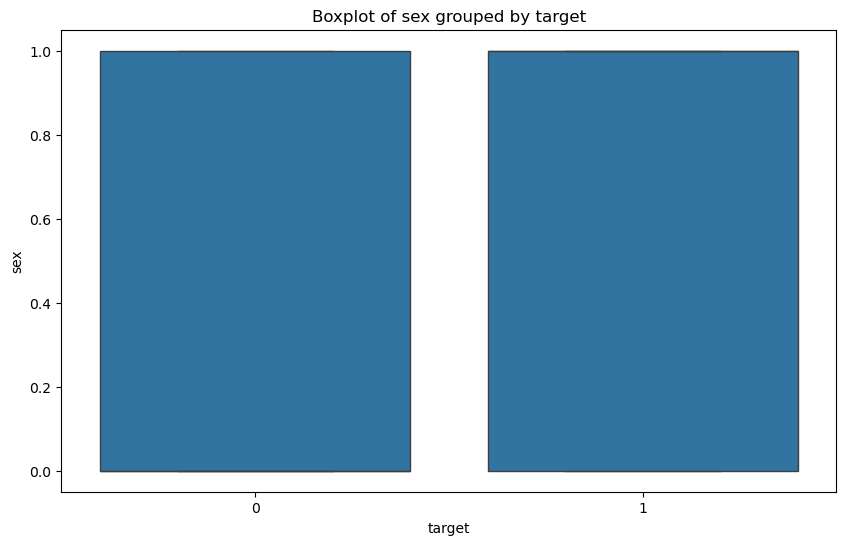

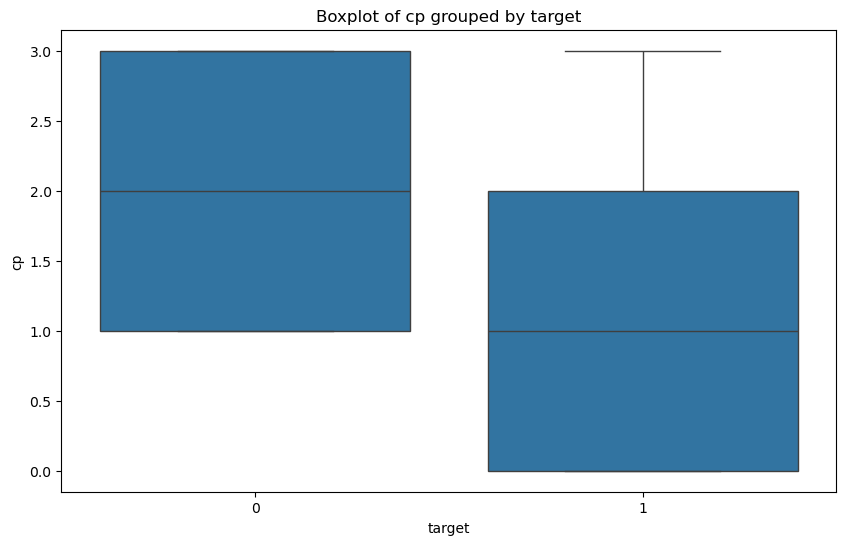

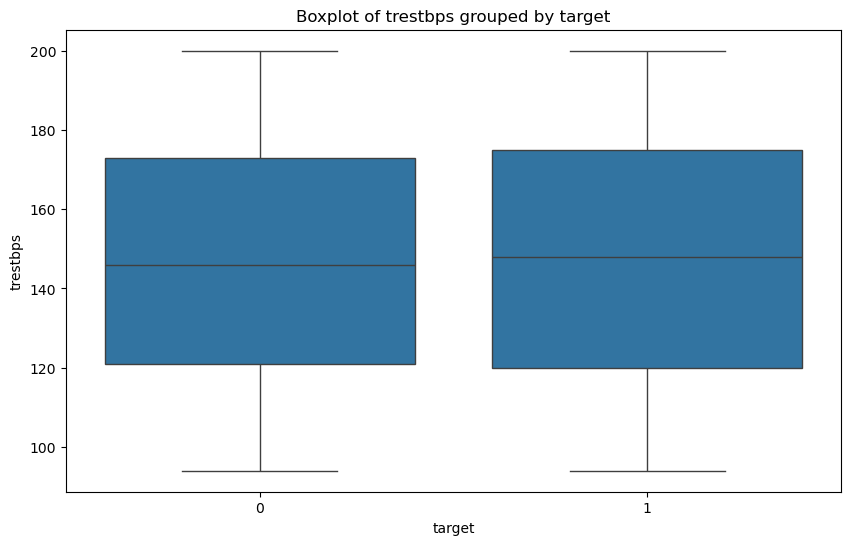

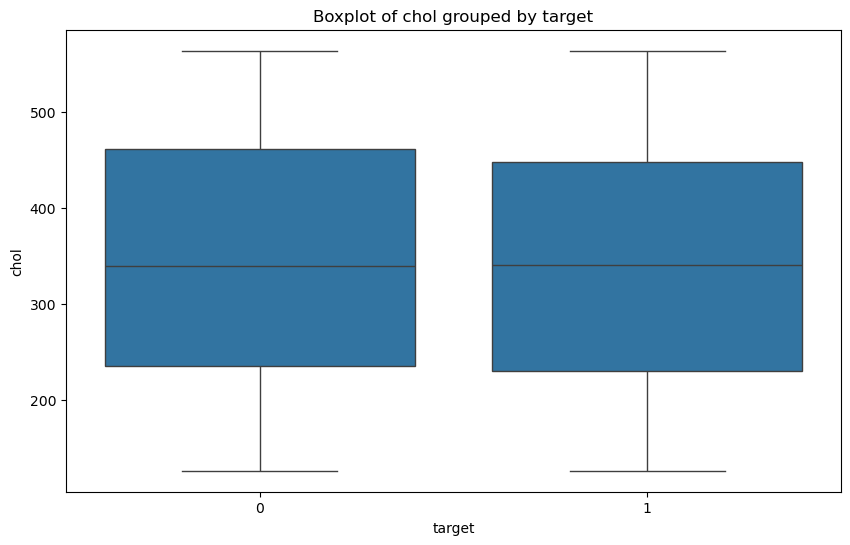

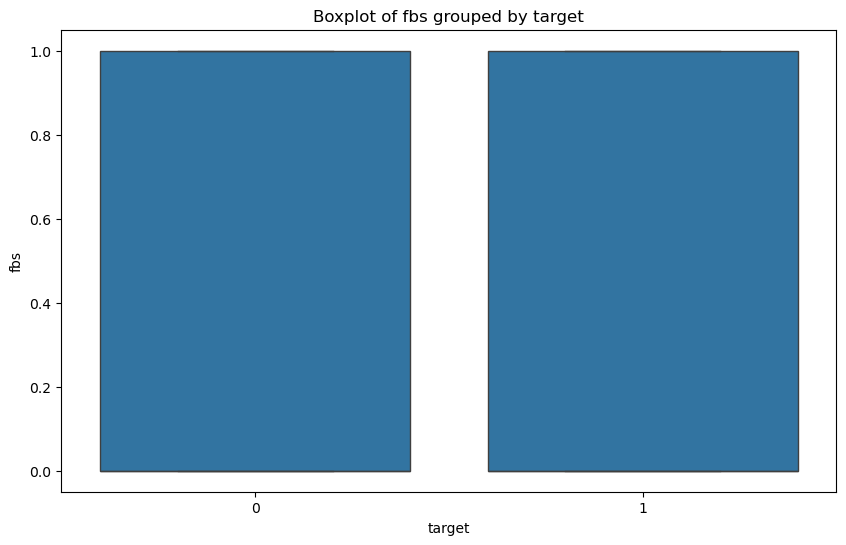

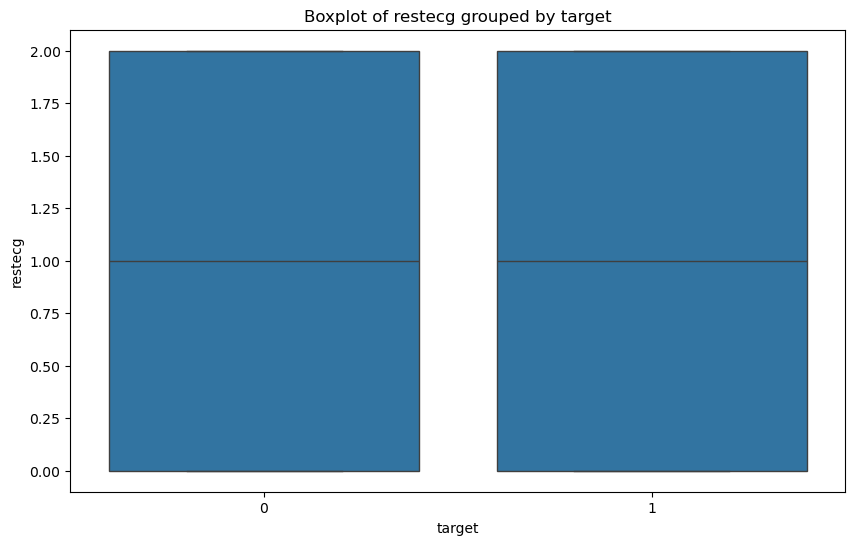

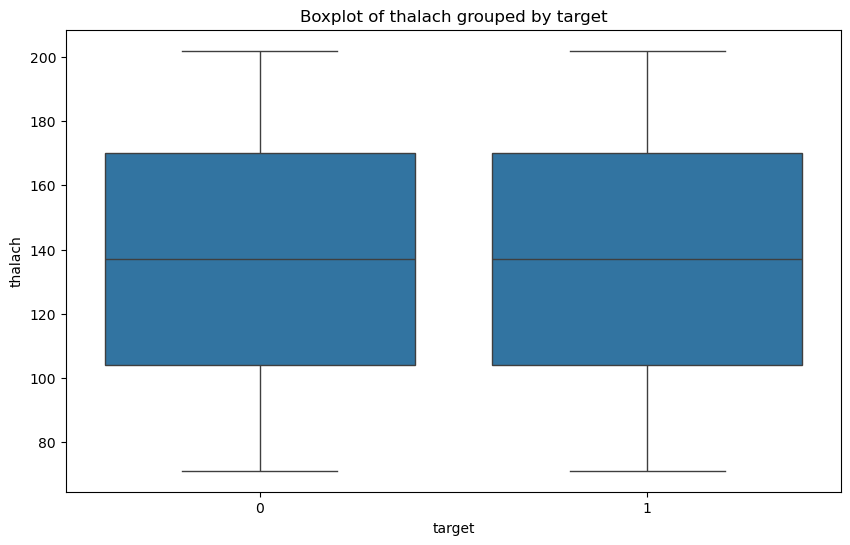

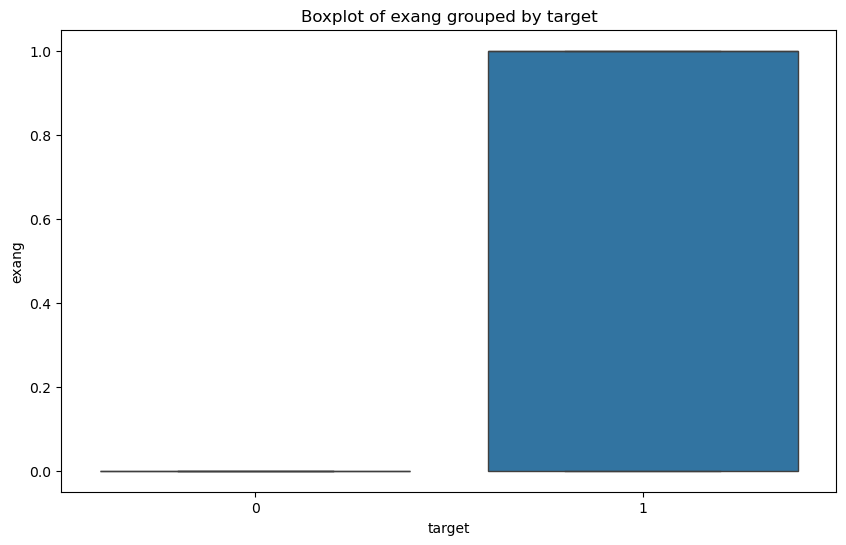

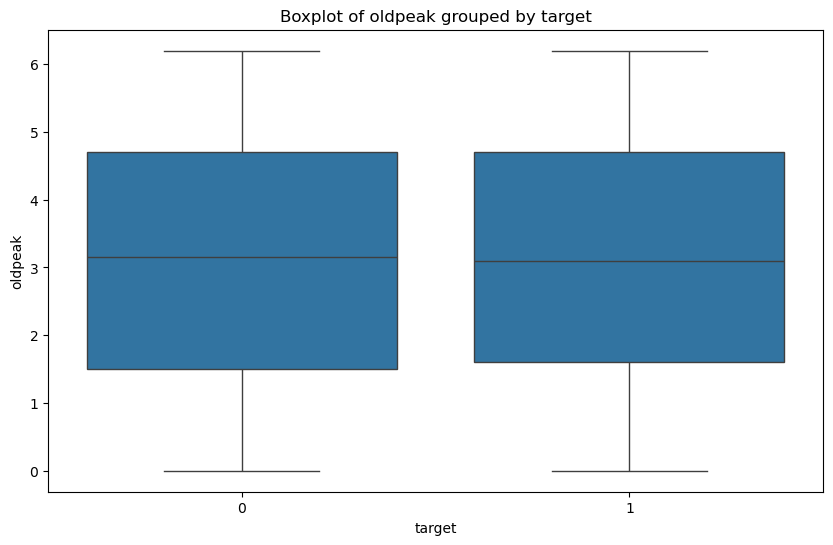

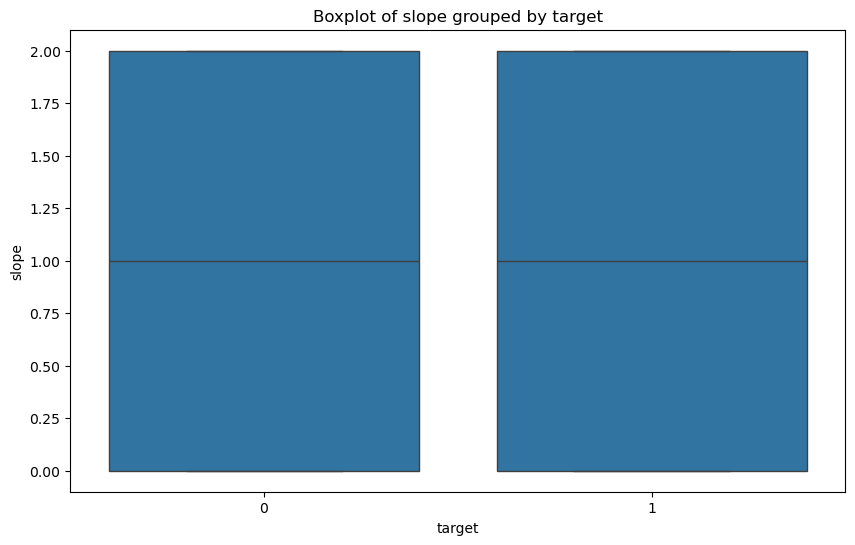

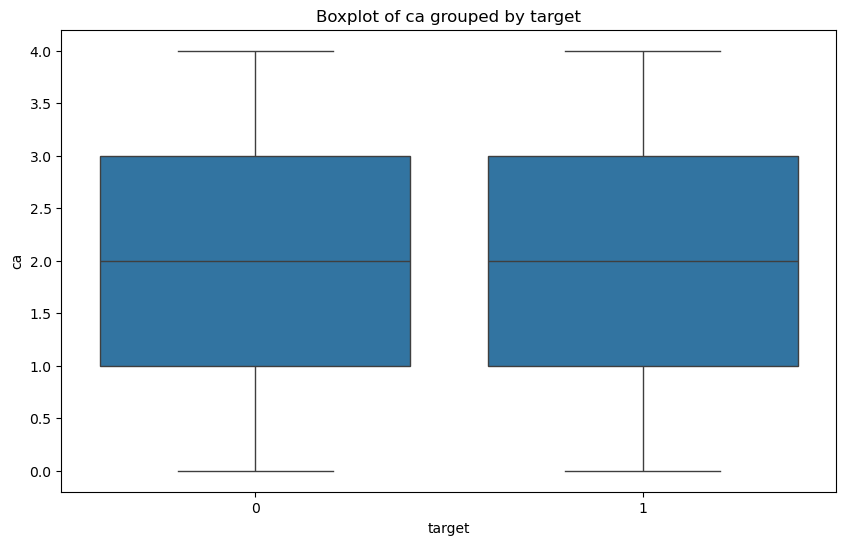

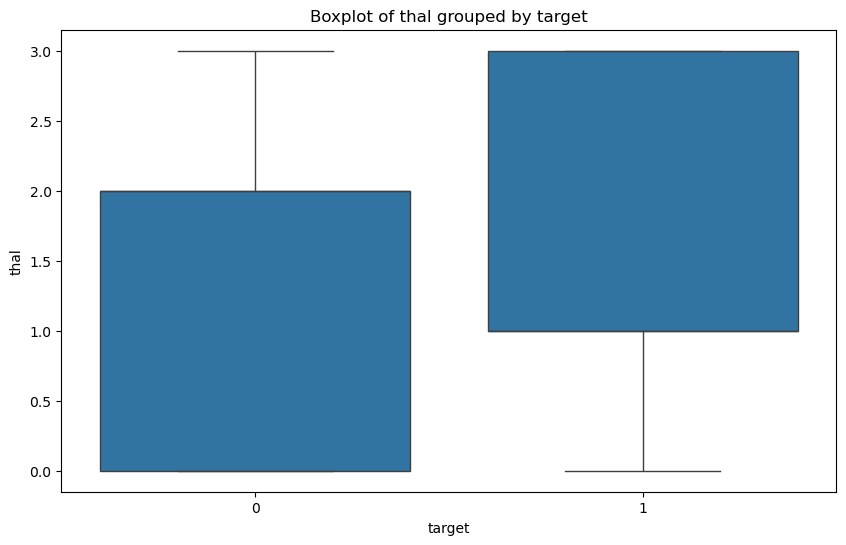

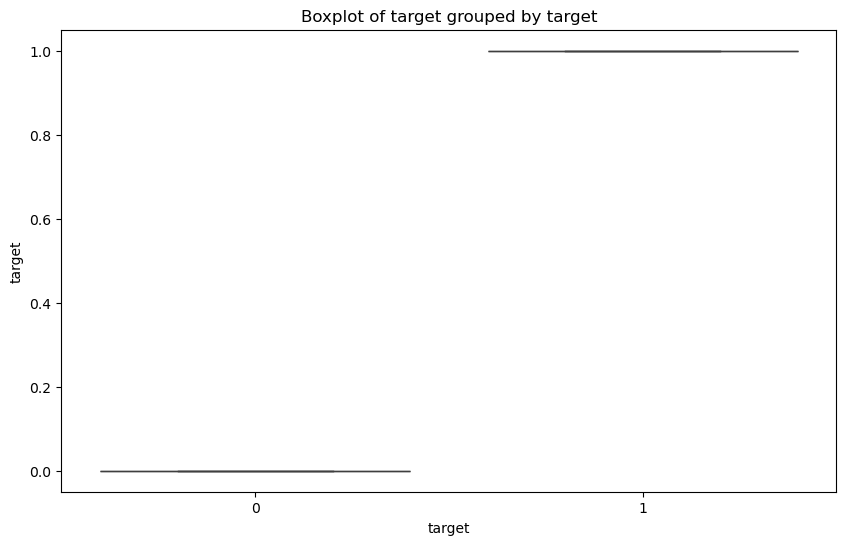

In [26]:
# Box plots of numerical features grouped by the target variable
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=column, data=data)
    plt.title(f'Boxplot of {column} grouped by target')
    plt.show()


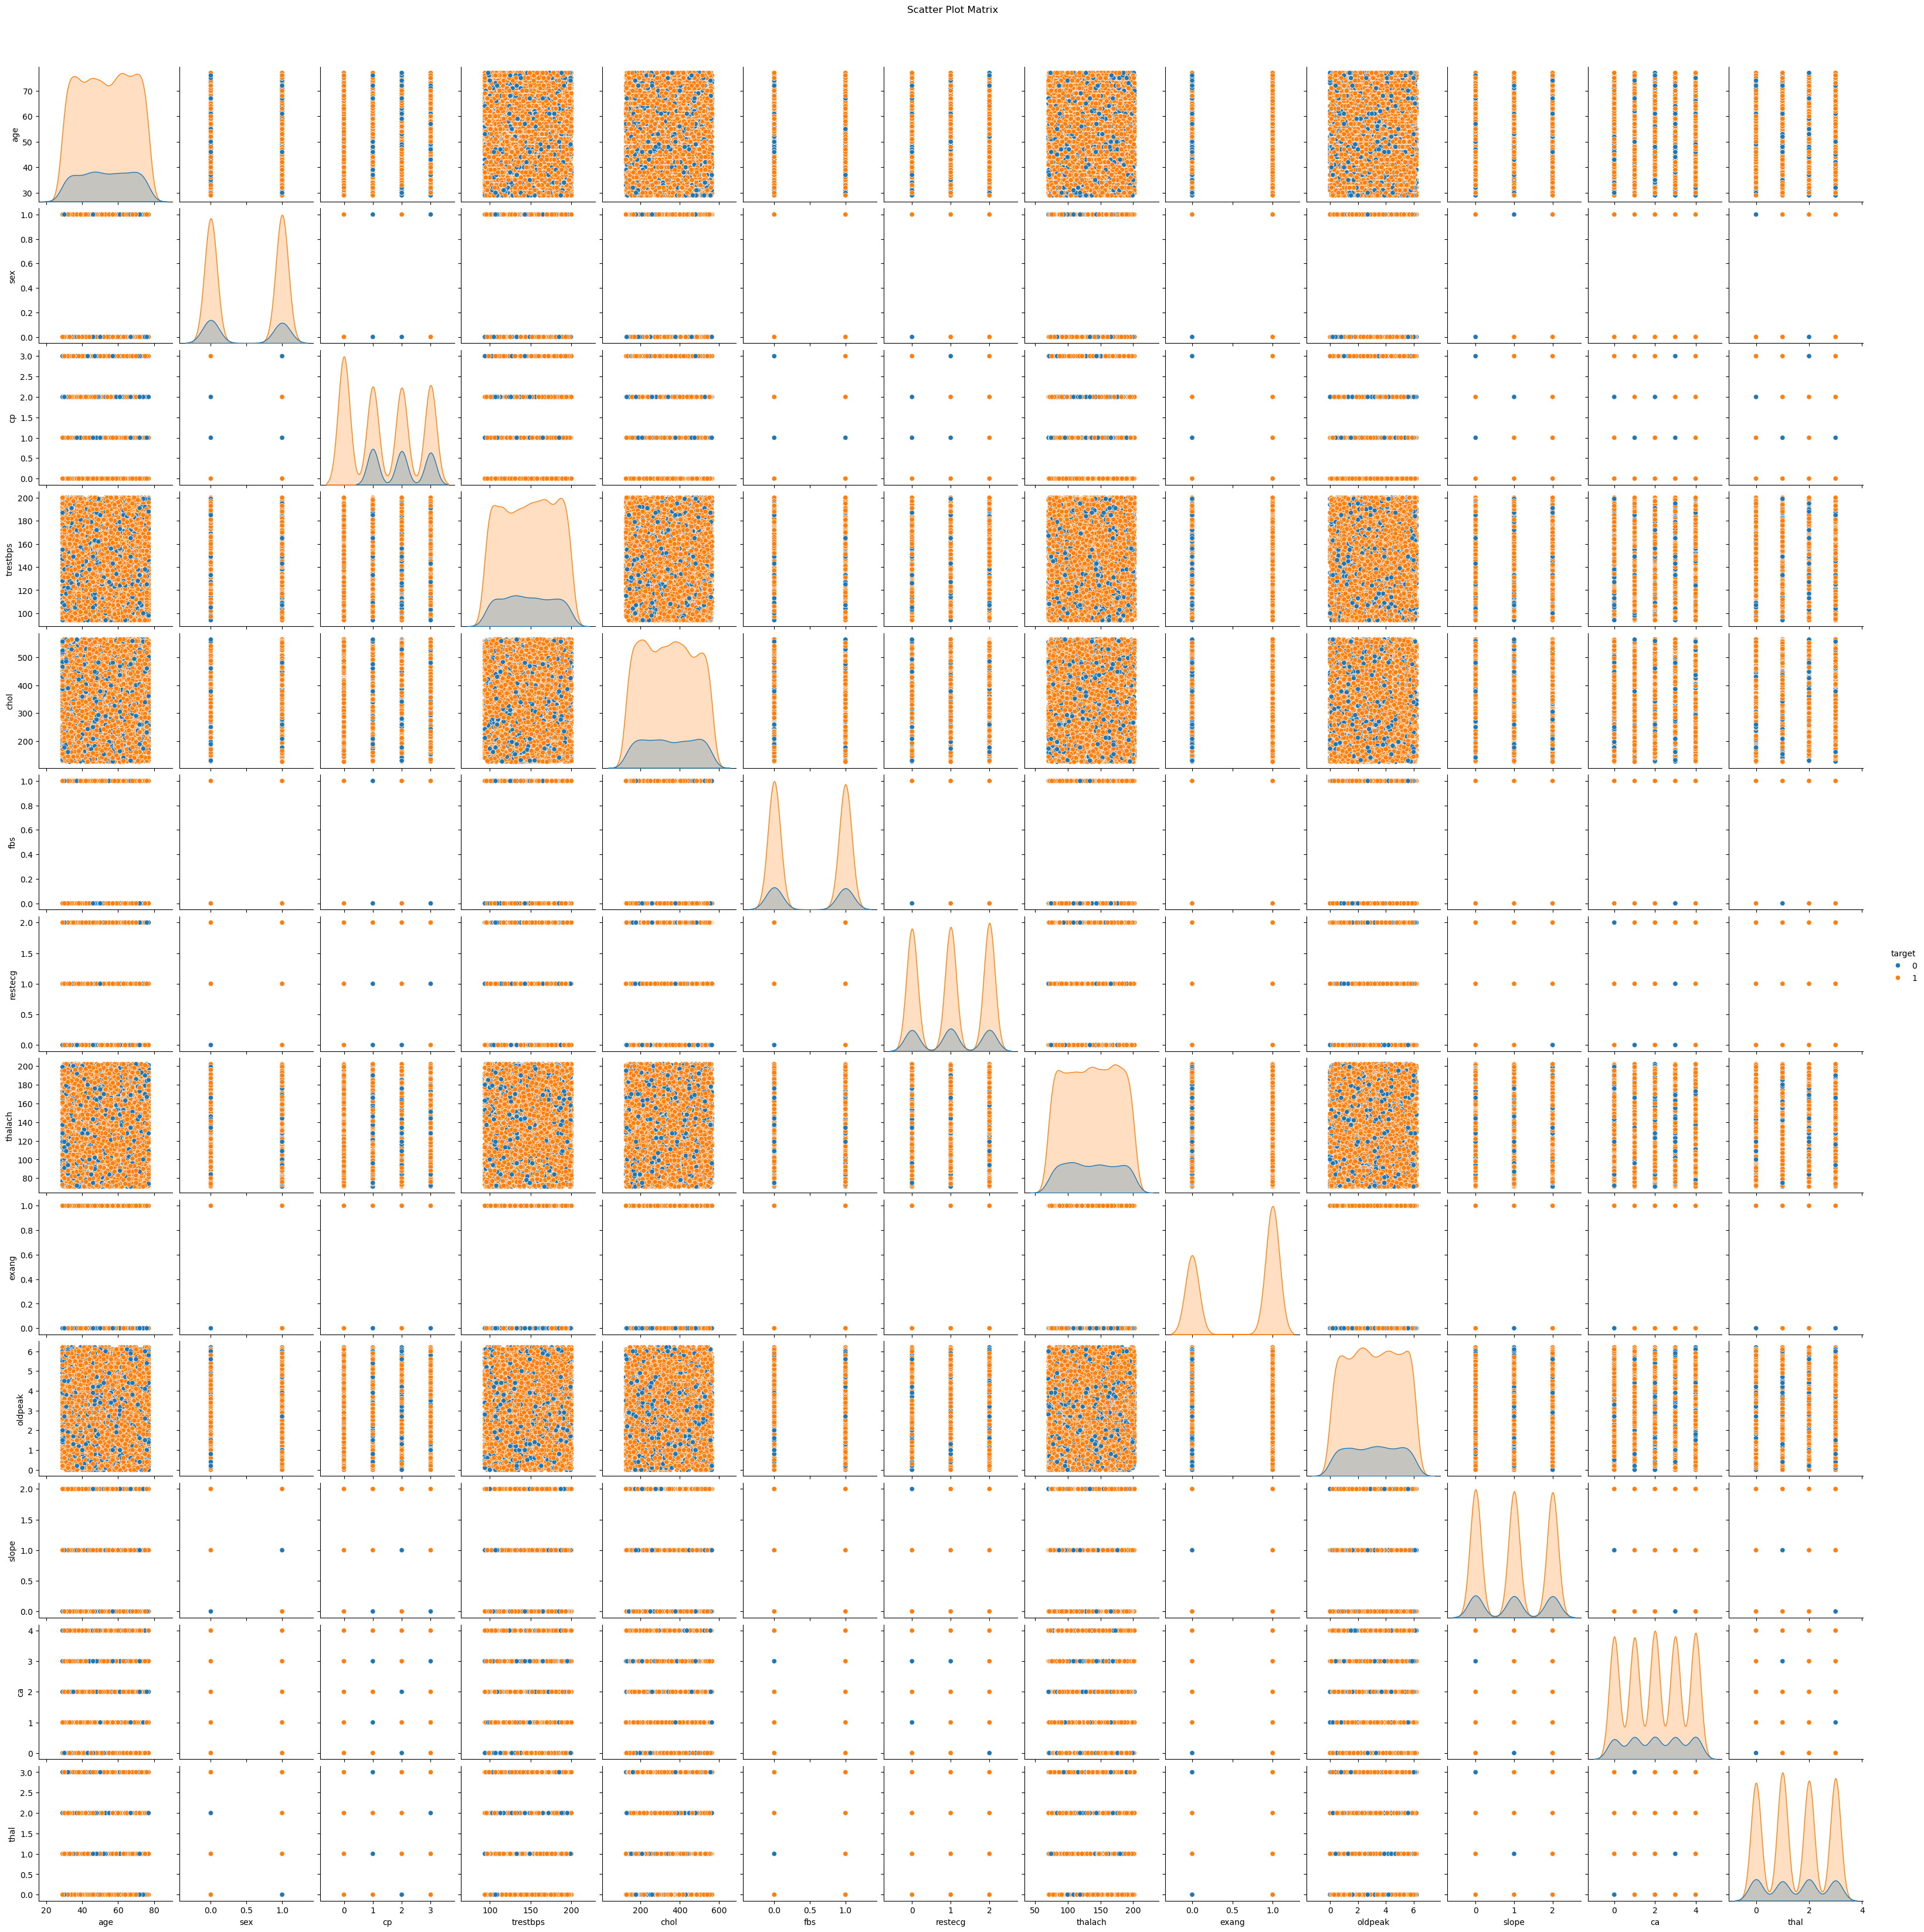

In [27]:
# Scatter plot matrix to visualize relationships between selected features
sns.pairplot(data, hue='target')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


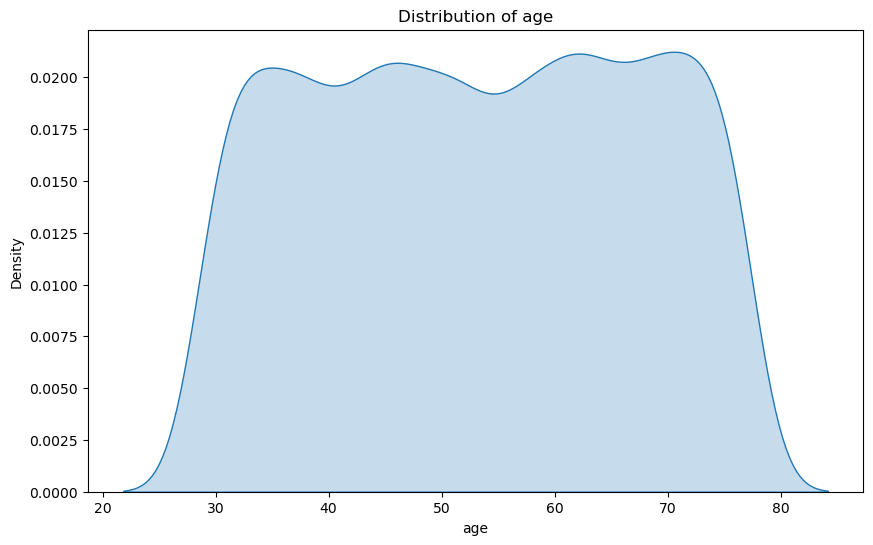

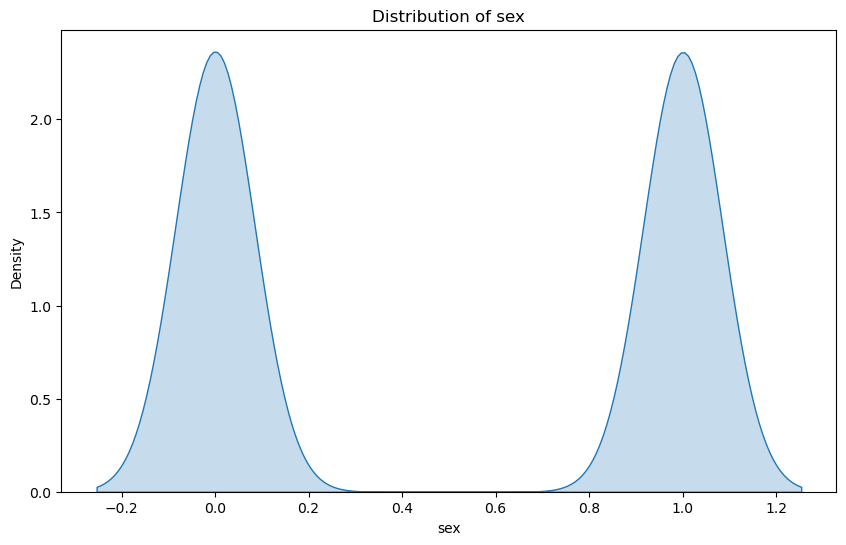

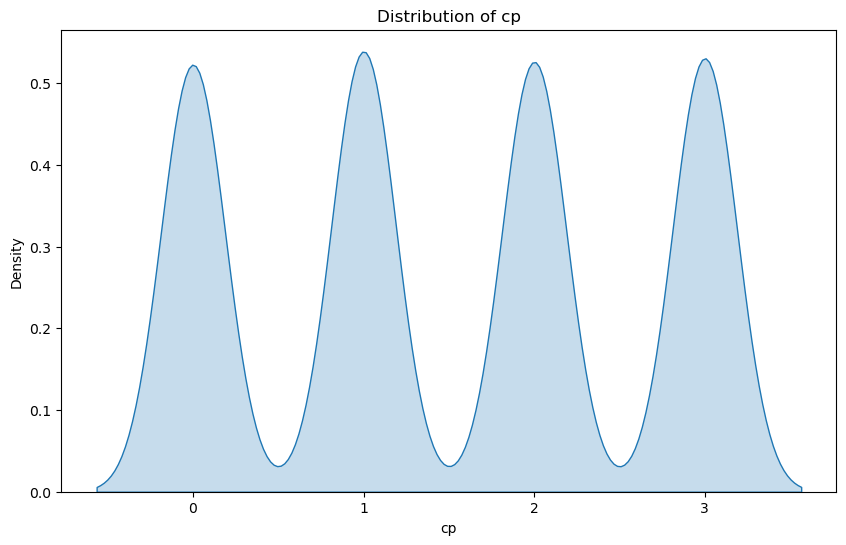

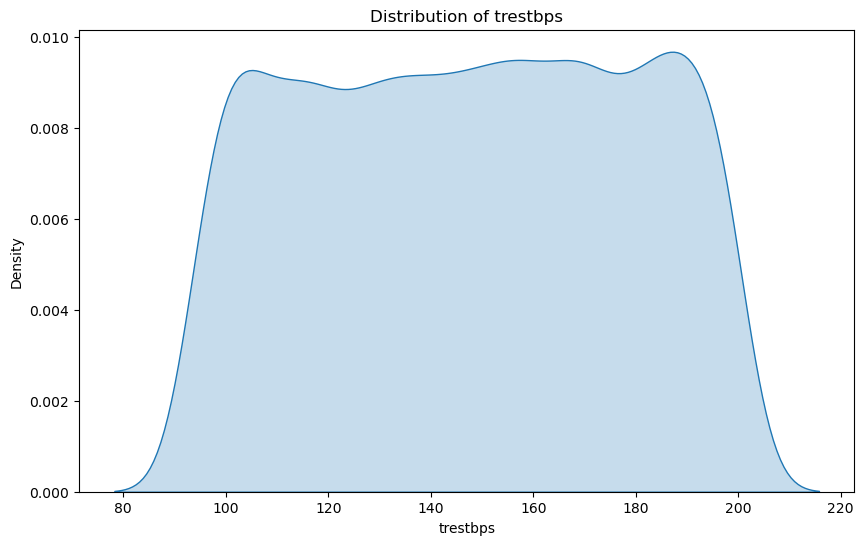

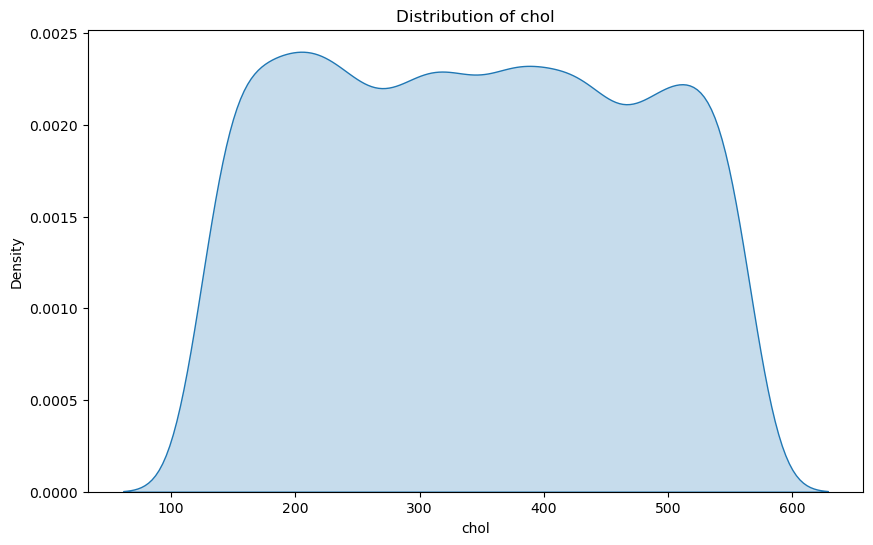

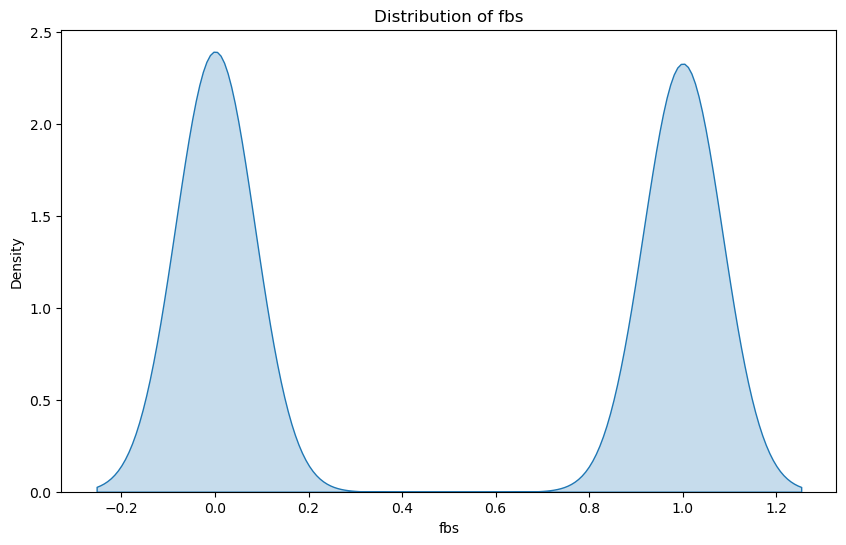

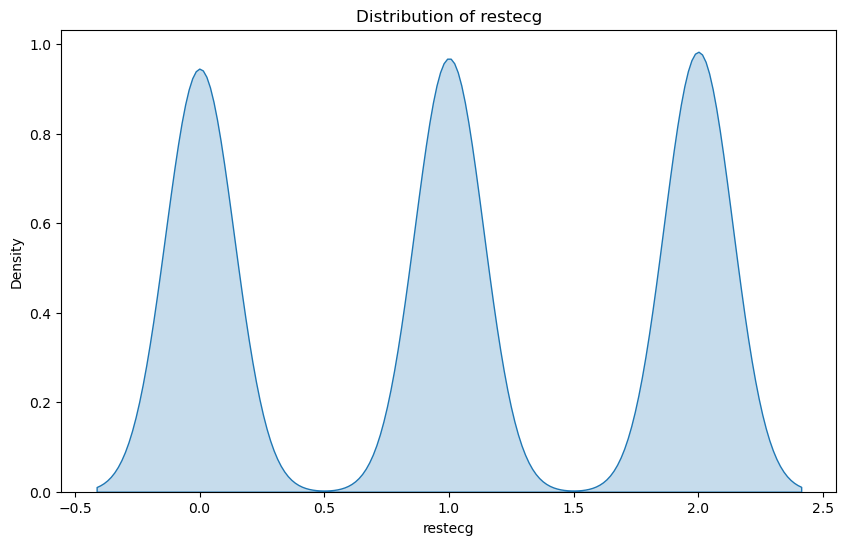

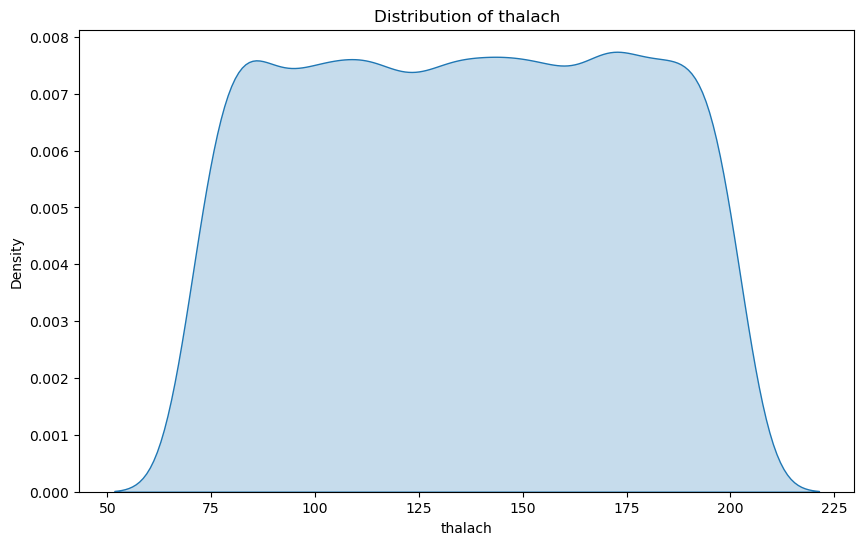

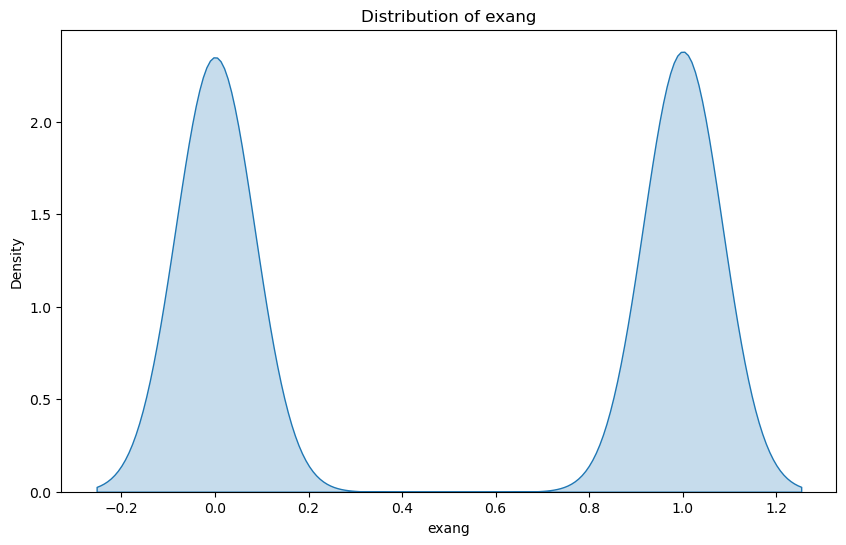

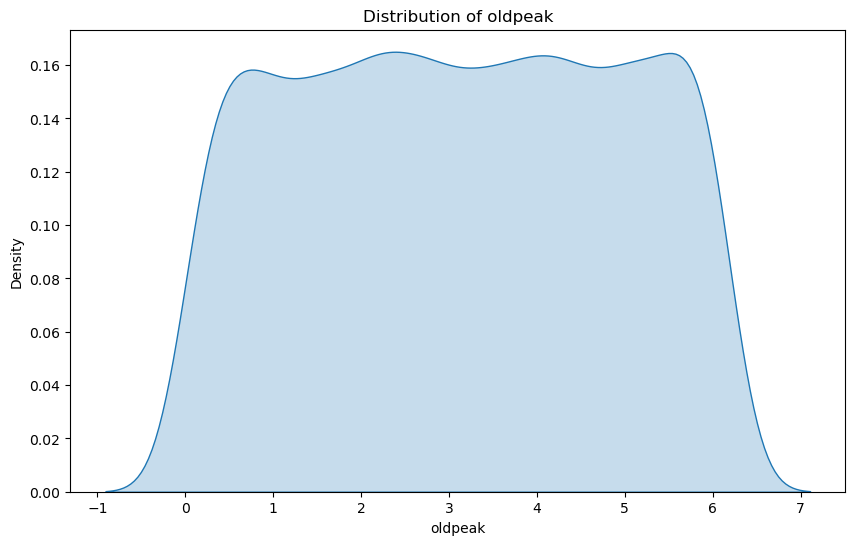

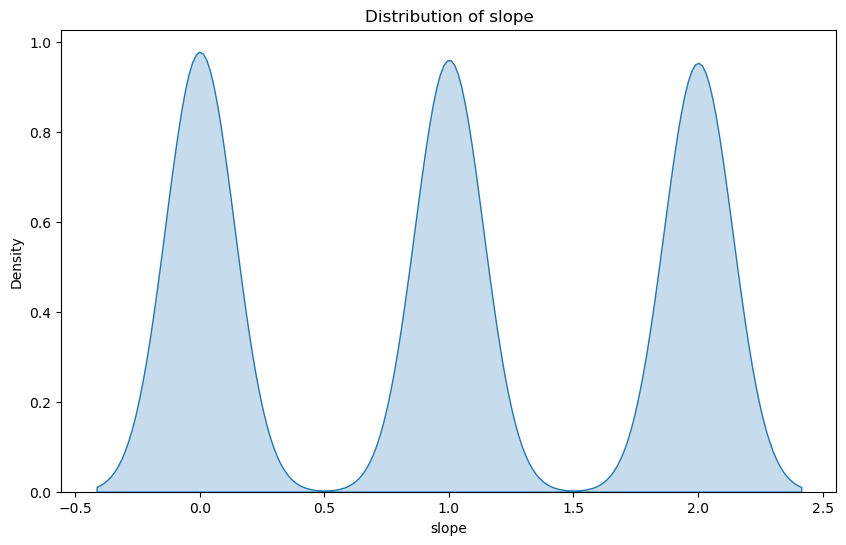

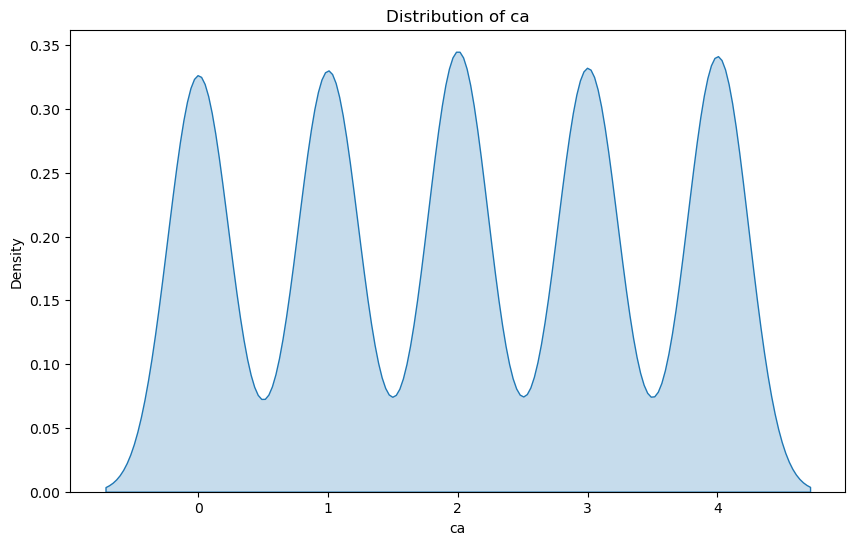

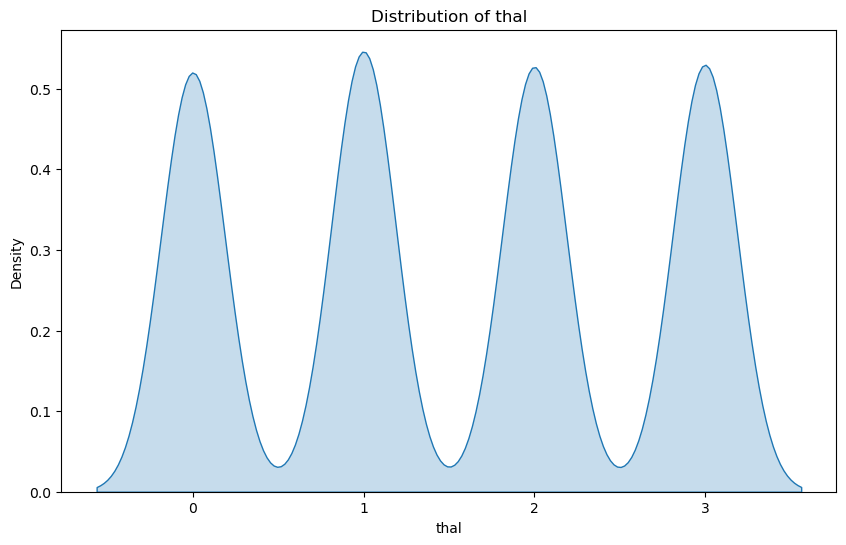

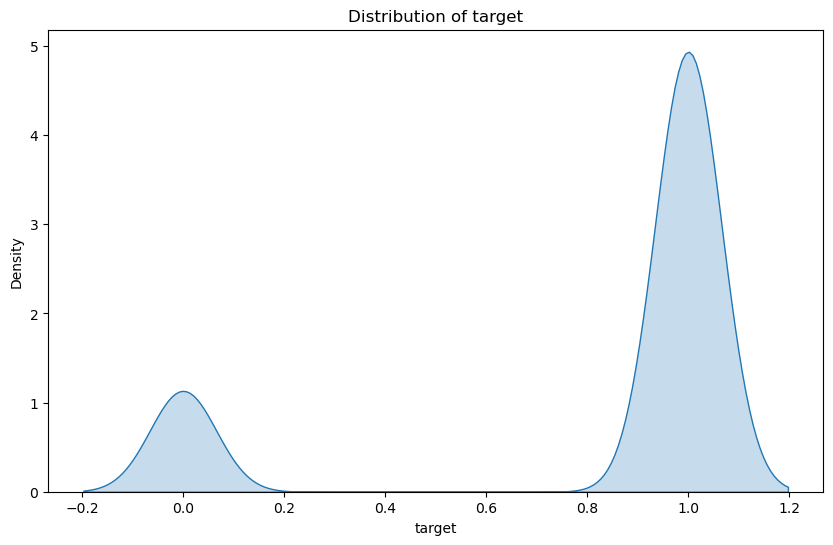

In [28]:
# Kernel Density Estimation (KDE) plot for numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [29]:
# Calculate Z-scores for each numerical feature
z_scores = np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64'])))

# Identify outliers based on a Z-score threshold (e.g., 3)
outliers = np.where(z_scores > 3)

# Display outliers
print(f'Number of outliers detected: {len(outliers[0])}')

Number of outliers detected: 0


In [30]:
X = data.drop(columns=['target'])
y = data['target']

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7303 non-null   int64  
 1   sex       7303 non-null   int64  
 2   cp        7303 non-null   int64  
 3   trestbps  7303 non-null   int64  
 4   chol      7303 non-null   int64  
 5   fbs       7303 non-null   int64  
 6   restecg   7303 non-null   int64  
 7   thalach   7303 non-null   int64  
 8   exang     7303 non-null   int64  
 9   oldpeak   7303 non-null   float64
 10  slope     7303 non-null   int64  
 11  ca        7303 non-null   int64  
 12  thal      7303 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 741.8 KB


In [65]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, roc_auc_score

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
possible_algos = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = possible_algos.fit(X_train, X_val, y_train, y_val)

  0%|          | 0/31 [00:00<?, ?it/s]

 97%|█████████▋| 30/31 [00:20<00:00,  2.08it/s]

[LightGBM] [Info] Number of positive: 4740, number of negative: 1102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811366 -> initscore=1.458910
[LightGBM] [Info] Start training from score 1.458910


100%|██████████| 31/31 [00:21<00:00,  1.45it/s]


In [52]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.76               0.85     0.85      0.79   
GaussianNB                         0.69               0.81     0.81      0.73   
QuadraticDiscriminantAnalysis      0.69               0.81     0.81      0.73   
BaggingClassifier                  0.82               0.74     0.74      0.82   
DecisionTreeClassifier             0.82               0.71     0.71      0.82   
Perceptron                         0.79               0.70     0.70      0.80   
XGBClassifier                      0.82               0.70     0.70      0.82   
AdaBoostClassifier                 0.82               0.69     0.69      0.82   
LGBMClassifier                     0.82               0.69     0.69      0.82   
LabelPropagation                   0.80               0.67     0.67      0.80   
LabelSpreading                     0.80               0.67     0.67      0.80   
ExtraTreeClassifier                0.81               0.67     0.67      0.81   
RandomForestClassifier             0.81               0.66     0.66      0.81   
ExtraTreesClassifier               0.82               0.66     0.66      0.81   
KNeighborsClassifier               0.81               0.65     0.65      0.80   
LinearSVC                          0.83               0.63     0.63      0.81   
LogisticRegression                 0.83               0.63     0.63      0.81   
LinearDiscriminantAnalysis         0.83               0.63     0.63      0.81   
CalibratedClassifierCV             0.82               0.63     0.63      0.81   
SVC                                0.81               0.62     0.62      0.80   
PassiveAggressiveClassifier        0.81               0.57     0.57      0.78   
SGDClassifier                      0.82               0.53     0.53      0.76   
RidgeClassifierCV                  0.82               0.51     0.51      0.75   
RidgeClassifier                    0.82               0.51     0.51      0.75   
BernoulliNB                        0.82               0.50     0.50      0.74   
DummyClassifier                    0.82               0.50     0.50      0.74   

                               Time Taken  
Model                                      
NearestCentroid                      0.08  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.12  
BaggingClassifier                    0.19  
DecisionTreeClassifier               0.06  
Perceptron                           0.04  
XGBClassifier                        0.37  
AdaBoostClassifier                   0.43  
LGBMClassifier                       0.79  
LabelPropagation                     2.70  
LabelSpreading                       3.22  
ExtraTreeClassifier                  0.03  
RandomForestClassifier               1.07  
ExtraTreesClassifier                 0.58  
KNeighborsClassifier                 0.39  
LinearSVC                            0.07  
LogisticRegression                   0.50  
LinearDiscriminantAnalysis           7.11  
CalibratedClassifierCV               0.17  
SVC                                  1.73  
PassiveAggressiveClassifier          0.06  
SGDClassifier                        0.04  
RidgeClassifierCV                    0.09  
RidgeClassifier                      1.41  
BernoulliNB                          0.02  
DummyClassifier                      0.03

In [36]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred = model.predict(X_val)

In [38]:
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

# Print accuracy and confusion matrix
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(cm)

# Step 7: Detailed classification report
print('Classification Report:')
print(classification_report(y_val, y_pred))

Accuracy: 0.8241
Confusion Matrix:
[[ 132  128]
 [ 129 1072]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       260
           1       0.89      0.89      0.89      1201

    accuracy                           0.82      1461
   macro avg       0.70      0.70      0.70      1461
weighted avg       0.82      0.82      0.82      1461



In [39]:
print(test.columns)


Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [40]:
# Make predictions on the test dataset
test_features = test.drop(columns=['id'])  # Assuming 'ID' column is not a feature
predictions = model.predict(test_features)

In [41]:
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [44]:
sam.head()

Id
0  16501
1  10444
2  14288
3  10409
4  17330

In [45]:
sub = sam.copy()
sub['target'] = predictions



In [46]:
sub

Id  target
0     16501       1
1     10444       1
2     14288       1
3     10409       1
4     17330       1
...     ...     ...
2692  14964       0
2693  16774       1
2694  18884       1
2695  10000       1
2696  17660       0

[2697 rows x 2 columns]

In [48]:
# Save the submission file
sub.to_csv('sub.csv', index=False)

In [53]:
cv_scores = cross_val_score(model, X, y, cv=7, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.81034483 0.81417625 0.80249281 0.81112176 0.8063279  0.79098754
 0.81303931]
Mean Accuracy: 0.8069
Standard Deviation: 0.0075


In [54]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [55]:
y_pred = model.predict(X_val)

In [56]:
# Make predictions on the test dataset
test_features = test.drop(columns=['id'])  # Assuming 'ID' column is not a feature
predictions = model.predict(test_features)

In [57]:
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [58]:
sub = sam.copy()
sub['target'] = predictions



In [59]:
# Save the submission file
sub.to_csv('sub1.csv', index=False)

In [62]:
models = NearestCentroid()

# Perform cross-validation (optional but recommended)
cv_scores = cross_val_score(models, X_train, y_train, cv=7, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.50419162 0.48742515 0.52215569 0.5005988  0.5263789  0.47721823
 0.47721823]
Mean CV Accuracy: 0.4993
Standard Deviation of CV Accuracy: 0.0185


In [64]:
model = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation (optional but recommended)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.78357571 0.78100941 0.78253425 0.77482877 0.78082192]
Mean CV Accuracy: 0.7806
Standard Deviation of CV Accuracy: 0.0030


In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation (optional but recommended)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.81950385 0.79469632 0.80650685 0.78938356 0.81078767]
Mean CV Accuracy: 0.8042
Standard Deviation of CV Accuracy: 0.0109


In [69]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_val)

In [70]:

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Test Accuracy: 0.8152
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.42      0.44       260
           1       0.88      0.90      0.89      1201

    accuracy                           0.82      1461
   macro avg       0.68      0.66      0.67      1461
weighted avg       0.81      0.82      0.81      1461



In [71]:
# Make predictions on the test dataset
test_feature = test.drop(columns=['id'])  # Assuming 'ID' column is not a feature
prediction = model.predict(test_feature)

In [72]:
prediction

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [73]:
sub = sam.copy()
sub['target'] = prediction



In [75]:
# Save the submission file
sub.to_csv('sub2.csv', index=False)